# Exercise 6. ex
(a) You are given a set of images hdr images. Combine the images (not necessary all) to one
image in such a way that the result image has higher quality then all given images in the
set. You can sum, subtract the images, divide by some constant, multiply by some mask,
etc.



In [21]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

def showImages(images, titles):
    fig=plt.figure(figsize=(20, 20))
    columns = 2
    rows = 2
    k=1
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        im = images[k-1]
        rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        plt.imshow(rgb, cmap=plt.cm.Spectral)
        plt.title(titles[k-1])
        k+= 1
    plt.show()

folder_path = "./data/hdr_images/"
img_titles = ["img01.tif", "img02.tif", "img03.tif", "img04.tif", "img05.tif"]
img_fn= [ folder_path +f for f in img_titles ]
img_list = [cv2.imread(fn, -1) for fn in img_fn]

# Exposure fusion using Mertens
merge_mertens = cv2.createMergeMertens()
res_mertens = merge_mertens.process(img_list)


(b) Visualise the results and explain how did you obtain them.

Pixels are weighted using contrast, saturation and well-exposedness measures, then images are combined using laplacian pyramids.

The resulting image weight is constructed as weighted average of contrast, saturation and well-exposedness measures.
The library of openCV relies on pyramidal image decomposition.
It assumes that the images are perfectly aligned.
Exposure fusion computes the desired image by keeping
only the “best” parts in the multi-exposure image sequence.
This process is guided by a set of quality measures, which
is aaggregated in a scalar-valued weight map.
It is useful to think of the input sequence as a stack of images. The final image is then obtained by collapsing the
stack using weighted blending


source: https://mericam.github.io/papers/exposure_fusion_reduced.pdf

Solution for a, b
Base on this example:
TODO https://docs.opencv.org/4.1.0/d2/df0/tutorial_py_hdr.html


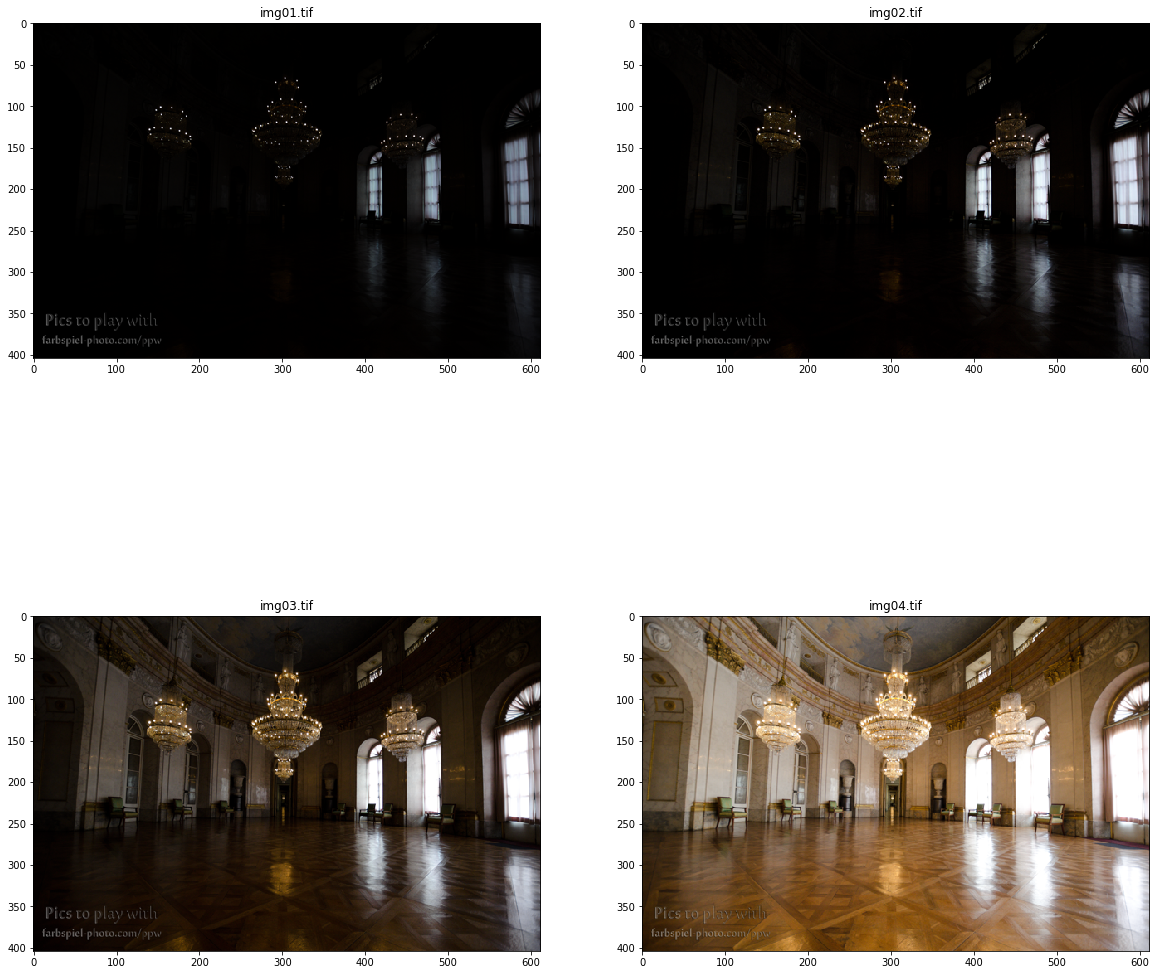

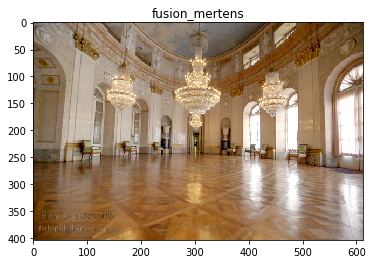

In [24]:
showImages(img_list, img_titles)

res_mertens_8bit = np.clip(res_mertens*255, 0, 255).astype('uint8')
rgb = cv2.cvtColor(res_mertens_8bit, cv2.COLOR_BGR2RGB)
plt.imshow(rgb, cmap = plt.cm.Spectral)
plt.title("fusion_mertens")
plt.show()
